In [1]:
import numpy as np
import pandas as pd
from pandas.plotting import register_matplotlib_converters
import matplotlib.pyplot as plt

from tslearn.generators import random_walks
from tslearn.preprocessing import TimeSeriesScalerMeanVariance, TimeSeriesResampler, TimeSeriesScalerMinMax
from tslearn.piecewise import PiecewiseAggregateApproximation, SymbolicAggregateApproximation, OneD_SymbolicAggregateApproximation
from tslearn.metrics import lb_envelope

import scipy.signal as sig

import src.packages.db.db_connect as db
import src.packages.utils.dataset as ds

%matplotlib notebook

register_matplotlib_converters()

figsize=(9.8, 5)

In [2]:
# Dataset
axes = 'y_axis'
timestamp = 'timestampdata'

interval_sec = 2

dataset_raw, ts, te = ds.get_dataset_from_db(start_min=54, start_sec=41, interval_sec=interval_sec)

dataset_axes = dataset_raw[axes].values
dataset_timestamp = dataset_raw[timestamp]

In [3]:
# Series
default_series = pd.Series(dataset_axes, index=dataset_timestamp)
series = pd.Series(dataset_axes, index=dataset_timestamp)

# Absolute
# series_default = series
series = series.abs()

# Resample
resample_size = 2000 * interval_sec
default_series = pd.Series(sig.resample(default_series.ravel(), resample_size))
series = pd.Series(sig.resample(series.ravel(), resample_size))

# Envelope
env_low, env_up = lb_envelope(series, radius=30)
# env_low, env_up = lb_envelope(env_up, radius=40)
series = pd.Series(env_up.ravel())

# Scale to Sax
n_paa_segments = 2000 * interval_sec
n_sax_symbols = 1000
n_layer = n_sax_symbols - 14

sax = SymbolicAggregateApproximation(n_segments=n_paa_segments, alphabet_size_avg=n_sax_symbols)

min_scaler = min(sax.breakpoints_avg_middle_)
max_scaler = max(sax.breakpoints_avg_middle_)

scaler = TimeSeriesScalerMinMax(min=min_scaler, max=max_scaler)
series = scaler.fit_transform(series)

sax_dataset_inv = sax.inverse_transform(sax.fit_transform(series))

In [4]:
idx_data = []
sax_list = list(sax_dataset_inv.ravel())

for i in range(len(sax_list)):
    # if sax_list[i] != 0.7554150263604693:
    #     idx.append(i)

    if sax_list[i] == sax.breakpoints_avg_middle_[0]:

#         j = i
#         while (sax_list[j] != sax.breakpoints_avg_middle_[n_layer]):
                                    
#             j = j - 1
#             if (j == 0):
#                 break

        idx_data.append(i)


4000


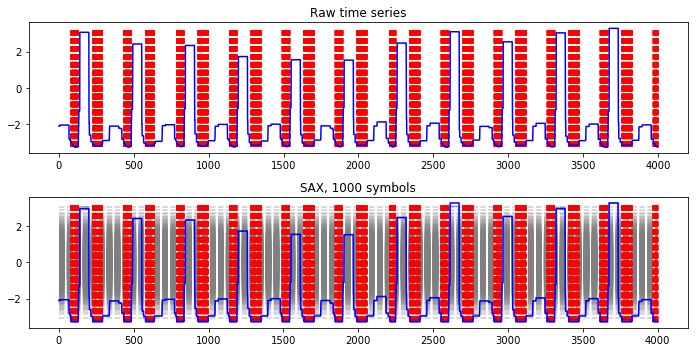

In [5]:
print('')
print(series.size)

plt.figure(figsize=figsize)
plt.subplot(2, 1, 1)  # First, raw time series
plt.vlines(idx_data, min_scaler, max_scaler, 'red', 'dashed')
plt.plot(series.ravel(), "b-", ms=2)
# plt.plot(env_up, "b-", ms=2, alpha=0.4)
plt.title("Raw time series")

plt.subplot(2, 1, 2)  # Then SAX
plt.hlines(sax.breakpoints_avg_ , 0, resample_size, 'gray', 'dashed', alpha=0.4)
plt.vlines(idx_data, min_scaler, max_scaler, 'red', 'dashed')
plt.plot(series.ravel(), "b-", alpha=0.4)
plt.plot(sax_dataset_inv[0].ravel(), 'b-')
plt.title("SAX, %d symbols" % n_sax_symbols)

plt.tight_layout()

plt.show()


4000


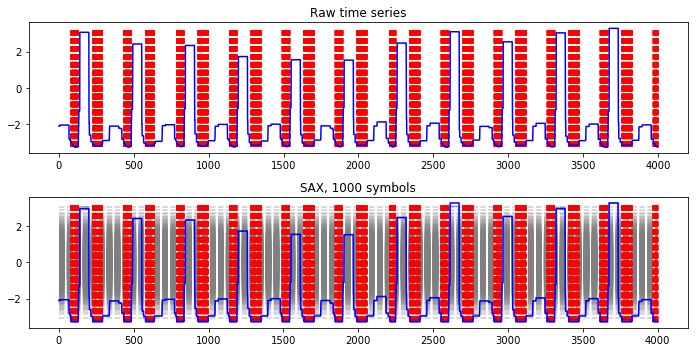

In [6]:
print('')
print(series.size)

plt.figure(figsize=figsize)
plt.subplot(2, 1, 1)  # First, raw time series
plt.vlines(idx_data, min_scaler, max_scaler, 'red', 'dashed')
plt.plot(series.ravel(), "b-")
plt.title("Raw time series")

plt.subplot(2, 1, 2)  # Then SAX
plt.hlines(sax.breakpoints_avg_ , 0, resample_size, 'gray', 'dashed', alpha=0.4)
plt.vlines(idx_data, min_scaler, max_scaler, 'red', 'dashed')
plt.plot(series.ravel(), "b-", alpha=0.4)
plt.plot(sax_dataset_inv[0].ravel(), 'b-')
plt.title("SAX, %d symbols" % n_sax_symbols)

plt.tight_layout()

plt.show()